# Future and Present Value

## Time Value of Money

"The money today worths more than money tomorrow".

The future money worth less because inflation will push prices down.

We can determine Future Value (FV) by two ways:
- Discrete model
- Continuous model

In [1]:
from math import exp


In [18]:
## Present and Future Value (Discrete Functions)
def futureDV(money, interestRate, time):
    '''Returns future discrete value'''
    return money*(1 + interestRate)**time

def presentDV(money, interestRate, time):
    '''Returns present discrete value'''
    return money*(1 + interestRate)**-time

## Present and Future Value (Continuous Functions based on differential equations)
def futureCV(money, interestRate, time):
    '''Returns future continuous value'''
    return money*exp(interestRate * time)

def presentCV(money, interestRate, time):
    '''Returns future continuous value'''
    return money*exp(-interestRate * time)

In [19]:
dol = 100
iRate = 0.05
n = 5
print(f"FV Discrete {futureDV(dol, iRate, n)}")
print(f"PV Discrete {presentDV(dol, iRate, n)}")
print(f"FV Continuous {futureCV(dol, iRate, n)}")
print(f"PV Continuous {presentCV(dol, iRate, n)}")


FV Discrete 127.62815625000003
PV Discrete 78.35261664684589
FV Continuous 128.40254166877415
PV Continuous 77.8800783071405


## Volatility

It is a statiscal **measure of dispersion** of returns based on **standard deviation**. Higher volatility means high risk.

We can use **Capital Asset Pricing Model (CAPM)** with a Beta value to approximate volatility.

## Future Contracts

Made in an attempt by producers and suppliers of assets with higher volatility (commodities, currency, etc) to **avoid market volatillity**.

They negotiate the price of a given asset in the future.

### Commodities

Commodities prices tipically **rise when inflation** is accelerating.
- Usually offers protections against inflation effects.

If we can't invest directly in a commodity, we can invest in a company that relies on the given commodity **(Pairs Trading Strategy)**.
- Gold and gold mines stocks.
    - It may be affected company performance, but usually there is a **positive correlation**.

### Currencies and the FOREX

**Exchange rate** is the rate at wich one national currency will be exchanged for another.
- This tell how much a given currency is worth in another currency.
- Governments and central banks can influence currency and exchanges rates.

**Forex** is the market for trading international currencies.

Factors Affecting Exchange Rates:
- **Interest rates**: can be manipulated by governments or central bank
    - Investors will lend money to banks of the given country for higher returns.
    
- **Money supply**: created by central bannk by printing too much currency 
    - May trigger **inflation**.
    - Investor will leave the currency that can push the value of a currency down
- **Financial Stability**: financial stability and economic growth have a huge impact of the exchange rate
    - Stability can be in political or financial sense
    
#### Arbitrage on the FOREX

We can construct a directed graph G(V, E) of the exchange rate table with V currencies.

- V nodes are currencies;
- E edges are relative values.

We take natural logarithm of the edges and multiply edges by -1.
- End up with a negative edge weighted G'(V, E) graph where **negative cycles are arbitrage opportunities**.

Besides that, we can use Bellman-Ford Shortest Path algorithm to find negatives cycles in O(V * E) running time.

It is only possible with high frequency trading.


## Bonds

It is a **debt investment**, which an investor loans money to an entity (company or government).

Bonds have some characteristics:
- Have a defined period of time;
- Interest rate can be variable or fixed.

They are considered as **fixed-income securities**

So when a company wants to raise money to projects they may issue bonds directly to investors instead get a loan from bank.

Usually, interest rates from bonds are **higher than loan to bank**.

### Type of Bonds

#### Zero-Coupon Bonds

This is the principal amount (a.k.a Face Value, Nominal Value or Par Value).

The principal amount is paid to the investor after a specified period of time.
- When dealing with zero-coupon bonds, no other cash payment is made.

Second parameters is **premium** or interest rate of the bond, it is what entity is willing to pay to investor.

Lastly, bonds have a **maturity date**, which is the agreement that defines the end of period.

Present Value is given by:

$$
PV = \frac{x}{(1 + r)^n}
$$


#### Coupon Bonds

Coupon bonds have principal amount too.

However, coupon bonds have **coupon rate**, it is a nominal percentage of the principal.
- The rate is paid annually
- Each coupon is redeembale per period for that percentage

To evaluate a coupon bonds, we need to calculate the present value for each coupon payment and then sum with present value of the principal, basically:

$$
\sum_{i = 1}^{n} \! \frac{c}{(1 + r)^i} + \frac{x}{(1 + r)^n}
$$

Another way to calculate is:

$$
\frac{c}{r}\; [1 - \frac{1}{(1 + r)^n}] + \frac{x}{(1 + r)^n}
$$

### Yield To Maturity (YTM)

#### Yield

It is a figure that show the return you get on a bond.

Calculable with a simple formula:

$$
\frac{annual\; coupon\; amount}{bond\; price}
$$

It is define how much money your investment is generating.

**Yield to Maturity** of a bond is the internal rate of return (overall interest rate) earned by an investor who buys bond at **t** (today) at **V** market price.

- We assume that the bond is held until T maturity
- All C<sub>i</sub> coupon and P principal payment are made on schedule

To calculate YTM, we have to solve this equation:

$$
V \; = \; \sum_{i = 1}^{n} c_i e^{-y(t_t - t)} + Pe^{-y(T-t)}
$$

Basically, we discount everything back to the **t** present gives the current **V** price.

### Bonds Prices and Market Interested Rates

Bonds and market interest rate **are negatively correlated**:
- When the cost of borrowing money rises, bonds price usually fall

Market interest rate is given (usually)  by monetary policy.
- If the market interest is high enough than it is better to **lend money to the bank** rather than buying bonds

### Macaulay Duration

**Macaulay Duration** is a measure of how long it takes for the price of a bond to be repaid by the cash flows.
- It is the time an investor would take to get back all his invested money in the bond by periodic interest as well as principal repayments
- For zero-coupon bonds, Macaulay duration is the same as **T** time to maturity

Bonds with longer **T** maturity are more sensitive to changes in market interest rate than bonds with short durations.

Therefore, Macaulay Duration defines **how sensitive the bond price is to the little change in the market interest rate**.
- Investor prefer bonds with longer maturity if they expect that interest rates will fall (and go down);
- Investor prefer bonds  with short maturity when interest rates are eithehr likely to go up or stay stable.

### Risk with Bonds

There are some risk associated to bonds:
- **Interest-Rate Risk**
    - Bond prices moves in opposite direction to changes in interest rate
- **Default Risk**
    - The risk that bond issuer may be unable to make principal and coupon payments on time
- **Inflation Risk**
    - Caused by variations in the value of cash flows dute to inflation as measured in terms of purchasing power

# Bonds Implementation with Python

In [3]:
from math import exp
class ZeroCouponBond:
    def __init__(self, principal, maturity, iRate):
        self.principal = principal
        self.maturity = maturity
        self.iRate = iRate/100
        
    def PV(self, x, n):
        return x / (1 + self.iRate)**n
    
    def Price(self):
        return self.PV(self.principal, self.maturity)
        
    def cPV(self, x, n):
        return x*exp(-self.iRate * n)
    
    def cPrice(self):
        return self.cPV(self.principal, self.maturity)
    
class CouponBond:
    def __init__(self, principal, rate, maturity, iRate):
        self.principal = principal
        self.rate = rate/100
        self.maturity = maturity
        self.iRate = iRate/100
        
    def PV(self, x, n):
        return x / (1 + self.iRate) ** n
    
    def Price(self):
        # ? Discount amount
        price = 0
        for t in range(1, self.maturity + 1):
            price = price + self.PV(self.principal * self.rate, t) 
        
        # ? Principal amount
        price  = price + self.PV(self.principal, self.maturity)
        
        return price

    def cPV(self, x, n):
        return x*exp(-self.iRate * n)
    
    def cPrice(self):
        price = 0
        for time in range(1, self.maturity + 1):
            price = price + self.cPV(self.principal * self.rate, time)
        
        price = price + self.cPV(self.principal, self.maturity)
        
        return price
        

In [4]:
# ! Discrete way
bond = ZeroCouponBond(1000, 2, 4)
print(f"Price of zero-coupon bond in dollars : {round(bond.Price(), 2)}")

bond = CouponBond(1000, 10, 3, 4)
print(f"Price of coupon bond in dollars : {round(bond.Price(), 2)}")

Price of zero-coupon bond in dollars : 924.56
Price of coupon bond in dollars : 1166.51


In [5]:
# ! Continuous way
bond = ZeroCouponBond(1000, 2, 4)
print(f"Price of zero-coupon bond in dollars : {round(bond.cPrice(), 2)}")

bond = CouponBond(1000, 10, 3, 4)
print(f"Price of coupon bond in dollars : {round(bond.cPrice(), 2)}")


Price of zero-coupon bond in dollars : 923.12
Price of coupon bond in dollars : 1164.0


## Statistics

### Expected Value 

The mean or expected value E(x) of an x random variable is the mean average value in the population.

Expected value is defined by:

$$
E(x) = \sum_{i} x_i p_i = \mu
$$

### Variance

The variance of an x random variable is the expected value of the squared deviations of variables from the mean, given by:

$$
\sigma^2 = E[(x - \mu)^2]
$$

### Standard Deviation

Defined as a square root of standard deviation:

$$
\sigma = \sqrt{\sigma^2}
$$

### Covariance

The covariance of an x and y is measure of the joint variability of two random variables, given by:

$$
Cov(x, y) = E[(x - \mu_x)(y - \mu_y)]
$$

It is a dimensional measure, but isn't normalized, making comparison between datasets with large spreads differences hard.

The covariance defines how tow variables move together.

### Correlation

Correlation value is always in range [-1, 1].

It is dimensionless measures because is covariance normalized by standard deviation:

$$
\delta(x,y) = \frac{Cov(x, y)}{\sigma_x \sigma_y}
$$

If correlation:
- **> 0**, a positive linear relationship;
- **= 0**, no relationship between variables;
- **< 0**, a negative linear relationship;


# Modern Portfolio Theory (a.k.a Markovitz Model)

It is a **portfolio optimization** model.
- Assists in the selection of the most efficient portfolio by considering variousu possible portfolios of given securities based on expected retuurn (mean) and risk (variance)

The main idea is combine multiple assets in order to reduce risk as much as possible.
- This concept is correlationed with **diverzification**

## Assumptions of Markovitz-Model

- Returns are normally distributed, so expected value is return and standard deviation is volatility
- Investor are risk-averse, that means that if investor wants more return, they need to take more risk
- Investor are not allowed to take short positions
- The stock will have the same performance in future based on his historical data
- It is about diverzification, so that means that we want to reduce risk as much as possible

The **efficient portfolio** is the portfolio that has the hightest reward foi a given level of risk or the lowest risk for a given return.

## Variables

- w<sub>i</sub>: Weight for i asset or stock;
- r<sub>i</sub>: return (historical data) for i-th asset or stock;
- u<sub>i</sub>: expected return (mean of returns)

To calculate u:
$$
E(x) = \sum_{i}x_i p_i
$$

To calculate returns, we use:
$$
r = \frac{S(t+1)-S(t)}{S(t)}
$$
Usually logarithm of return is used because mathematical convenience
$$
r = ln\frac{S(t+1)}{S(t)}
$$

## Expected Return

The Markovitz model is:
$$
\mu_{portfolio} = E(\Sigma_i w_i r_i) = \Sigma_i w_i E(r_i) = \Sigma_i w_i \mu_i = w^T\mu
$$

## Risk of Portfolio

The risk can be measured by the volatility, which can be approximated by standard deviation or variace.

We can define covariance to understand how variables move together:

$$
\sigma_{ij} = E[(r_i - \mu_i)(r_j - \mu_j)]
$$

If covariance:
- < 0: Move inversely
- \> 0: Moves together

For portfolio, variance is:

$$
\sigma^2_{portfolio} = E[(r_i - \mu_i)^2] = \sum_i \sum_j w_i w_j \sigma_{ij} = w^T\Sigma w
$$

## Sharpe Ratio

It is a **risk and return measure**.

Sharpe ratio describes how much excess return you are receiving for extra volatility that you are holding in a risky asset.

The formula is:

$$
S(x) = \frac{r_x - R_f}{\sigma (x)}
$$

Where:
- r<sub>x</sub>: average rate of return of an investment x
- R<sub>f</sub>: rate of return of risk-free security

A sharpe-ratio S(x) > 1 is considered to be a good investment.

In [1]:
import numpy as np
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as optimization

In [71]:
stocks = ['AAPL', 'WMT', 'TSLA', 'GE', 'AMZN', 'DB']

inicio = '2012-01-01'
fim = '2017-01-01'

# Numbers of a trading days in a year
NUM_TRADING_DAYS = 252
# Numbers of randoms different portfolios
NUM_PORTFOLIOS = 10000

def downloadData():
    '''Download market data with Yahoo Finance'''
    stockData = {}
    for stock in stocks:
        ticker = yf.Ticker(stock)
        stockData[stock] = ticker.history(start = inicio, end = fim)['Close']
        
    return pd.DataFrame(stockData)

def showData(data):
    '''Plots a graph'''
    data.plot(figsize = (15, 8))
    plt.show()
    
def calculateReturn(data):
    '''Calculate log return (Normalization)'''
    logReturn = np.log(data/data.shift(1))
    return logReturn[1:]

def showST(returns):
    '''Show statistics of annual metrics'''
    print(returns.mean() * NUM_TRADING_DAYS)
    print(returns.cov() * NUM_TRADING_DAYS)
    
def showMV(returns):
    '''Show mean variance'''
    portfolioReturn = np.sum(returns.mean() * weights) * NUM_TRADING_DAYS
    # np.dot() multiplies arrays
    portfolioVolatility = np.sqrt(np.dot(weight.T, np.dot(returns.cov() * NUM_TRADING_DAYS, weight)))
    print(f"Expected portfolio mean return {portfolioReturn}")
    print(f"Expected portfolio volatility {portfolioVolatility}")

def generatePortfolio(returns):
    '''Generate multiples portfolios'''
    pfMeans = []
    pfRisk = []
    pfWeights = []
    
    for _ in range(NUM_PORTFOLIOS):
        weight = np.random.random(len(stocks))
        weight /= np.sum(weight)
        pfWeights.append(weight)
        pfMeans.append(np.sum(returns.mean() * weight) * NUM_TRADING_DAYS)
        pfRisk.append(np.sqrt(np.dot(weight.T, np.dot(returns.cov() * NUM_TRADING_DAYS, weight))))
    
    return np.array(pfWeights), np.array(pfMeans), np.array(pfRisk)
    
def showPortfolios(returns, vols):
    plt.figure(figsize = (15, 8))
    plt.scatter(vols, returns, c = returns/vols, marker = 'o')
    plt.grid(True)
    plt.xlabel('Expected Volatility')
    plt.ylabel('Expected Return')
    plt.colorbar(label = 'Sharpe Ratio')
    
def statistics(weights, returns):
    pfReturn = np.sum(returns.mean() * weights) * NUM_TRADING_DAYS
    pfVol = np.sqrt(np.dot(weights.T, np.dot(returns.cov() * NUM_TRADING_DAYS, weights)))
    return np.array([pfReturn, pfVol, pfReturn/pfVol])

# SciPy optimize can found the minimum of a given functions, in this case, we will find min volatility
# the maximum of a f(x) is the minimum of -f(x)
def minFunctionSharpe(weights, returns):
    '''Get the statistics of sharpe ratio'''
    return -statistics(weights, returns)[2]

def optimizePort(weights, returns):
    '''Look for the portfolio with max sharpe ratio'''
    # The sum of weights is 1
    constraints = {
        'type': 'eq',
        'fun': lambda x: np.sum(x) - 1
    }
    bounds = [tuple((0, 1)) for _ in range(len(stocks))]
    return optimization.minimize(fun = minFunctionSharpe, x0 = weights[0],
                          args = returns, method = 'SLSQP', bounds = bounds,
                         constraints = constraints)

def optimalPortfolio(optimum, returns):
    print(f"Optimal portfolio is {optimum['x'].round(3)}")
    print(f"Expected return, vol and Sharpe Ratio is {statistics(optimum['x'].round(3), returns)}")
    
def showOP(opt, rets, pfRets, pfVols):
    plt.figure(figsize = (15, 8))
    plt.scatter(pfVols, pfRets, c = pfRets/pfVols, marker = 'o')
    plt.grid(True)
    plt.xlabel('Expected Volatility')
    plt.ylabel('Expected Return')
    plt.colorbar(label = 'Sharpe Ratio')
    plt.plot(statistics(opt['x'], rets)[1], statistics(opt['x'], rets)[0], 'g*', markersize = 20)
    plt.show()

In [3]:
def downloadData():
    '''Download market data with Yahoo Finance'''
    stockData = {}
    for stock in stocks:
        ticker = yf.Ticker(stock)
        stockData[stock] = ticker.history(start = inicio, end = fim)['Close']
        
    return pd.DataFrame(stockData)

In [2]:
stocks = ['AAPL', 'WMT', 'TSLA', 'GE', 'AMZN', 'DB']

inicio = '2012-01-01'
fim = '2017-01-01'



In [4]:
dados = downloadData()

In [105]:
portOtimos = Portfolios(dados)
#print(NUM_PORTFOLIOS)

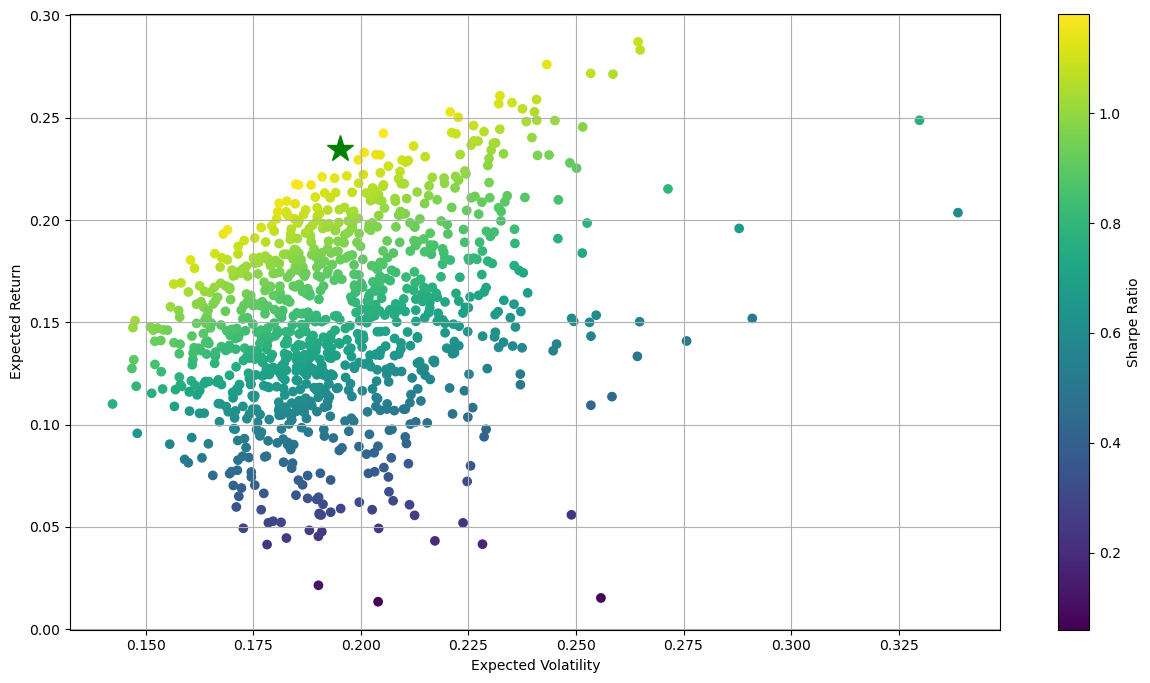

In [110]:
portOtimos.figuraOP()

In [112]:
portOtimos.optimalPortfolio()

Optimal portfolio for ['AAPL', 'WMT', 'TSLA', 'GE', 'AMZN', 'DB'] is [0.139 0.    0.166 0.373 0.321 0.   ]
Expected return, vol and Sharpe Ratio is [0.23440554 0.19510547 1.20142986]


In [109]:
NUM_PORTFOLIOS = 10000
NUM_TRADING_DAYS = 252
# Código baseado em classe para implementação em projetos futuros
class Portfolios:
    def __init__(self, dados):
        self.dados = dados
        self.retornos = self.calculateReturn(self.dados)
        
        self.portfolios = {}
        
        self.portfolios['weights'], self.portfolios['means'],  self.portfolios['risks'] = self.generatePortfolios(self.retornos)
        
        self.otimo = self.optimizePort(self.portfolios['weights'], self.retornos)
        
        
    
    
    def calculateReturn(self, data):
        '''Calculate log return (Normalization)'''
        logReturn = np.log(data/data.shift(1))
        return logReturn[1:]
    
    def generatePortfolios(self, returns):
        '''Generate multiples portfolios'''
        pfMeans = []
        pfRisk = []
        pfWeights = []

        for _ in range(NUM_PORTFOLIOS):
            weight = np.random.random(len(stocks))
            weight /= np.sum(weight)
            pfWeights.append(weight)
            pfMeans.append(np.sum(returns.mean() * weight) * NUM_TRADING_DAYS)
            pfRisk.append(np.sqrt(np.dot(weight.T, np.dot(returns.cov() * NUM_TRADING_DAYS, weight))))

        return np.array(pfWeights), np.array(pfMeans), np.array(pfRisk)
    
        
    def optimalPortfolio(self):
        optimum = self.otimo
        returns = self.retornos
        print(f"Optimal portfolio for {self.dados.columns.tolist()} is {optimum['x'].round(3)}")
        print(f"Expected return, vol and Sharpe Ratio is {self.statistics(optimum['x'].round(3), returns)}")
    
   
    def figuraData(self):
        '''Plots a graph'''
        data = self.dados
        data.plot(figsize = (15, 8))
        plt.show()
        
    def figuraPortfolio(self):
        returns = self.portfolios['means']
        vols = self.portfolios['risks']
        plt.figure(figsize = (15, 8))
        plt.scatter(vols, returns, c = returns/vols, marker = 'o')
        plt.grid(True)
        plt.xlabel('Expected Volatility')
        plt.ylabel('Expected Return')
        plt.colorbar(label = 'Sharpe Ratio')
    
    def figuraOP(self):
        opt = self.otimo
        rets = self.retornos
        pfRets = self.portfolios['means']
        pfVols = self.portfolios['risks']
        plt.figure(figsize = (15, 8))
        plt.scatter(pfVols, pfRets, c = pfRets/pfVols, marker = 'o')
        plt.grid(True)
        plt.xlabel('Expected Volatility')
        plt.ylabel('Expected Return')
        plt.colorbar(label = 'Sharpe Ratio')
        plt.plot(self.statistics(opt['x'], rets)[1], self.statistics(opt['x'], rets)[0], 'g*', markersize = 20)
        plt.show()
    
    def optimizePort(self, weights, returns):
        '''Look for the portfolio with max sharpe ratio'''
        # The sum of weights is 1
        constraints = {
            'type': 'eq',
            'fun': lambda x: np.sum(x) - 1
        }
        bounds = [tuple((0, 1)) for _ in range(len(stocks))]
        return optimization.minimize(fun = self.minFunctionSharpe, x0 = weights[0],
                              args = returns, method = 'SLSQP', bounds = bounds,
                             constraints = constraints)

    def statistics(self, weights, returns):
        pfReturn = np.sum(returns.mean() * weights) * NUM_TRADING_DAYS
        pfVol = np.sqrt(np.dot(weights.T, np.dot(returns.cov() * NUM_TRADING_DAYS, weights)))
        return np.array([pfReturn, pfVol, pfReturn/pfVol])

    # SciPy optimize can found the minimum of a given functions, in this case, we will find min volatility
    # the maximum of a f(x) is the minimum of -f(x)
    def minFunctionSharpe(self, weights, returns):
        '''Get the statistics of sharpe ratio'''
        return -self.statistics(weights, returns)[2]    

In [42]:
#dados = downloadData()
#showData(dados)
retornos = calculateReturn(dados)
#showStatistics(retornos)
portfolios = {}
portfolios['weights'], portfolios['means'], portfolios['risks'] = generatePortfolio(retornos)

In [60]:
portfolios['weights']

array([[0.16331626, 0.02555109, 0.27470391, 0.10092838, 0.20466033,
        0.23084004],
       [0.09095742, 0.16146324, 0.26127451, 0.22104263, 0.17396587,
        0.09129632],
       [0.38535265, 0.13121173, 0.1514989 , 0.11803762, 0.10311767,
        0.11078142],
       ...,
       [0.1873303 , 0.03045823, 0.12071614, 0.13290808, 0.23861563,
        0.28997163],
       [0.24054466, 0.03874278, 0.01999159, 0.06847088, 0.31736655,
        0.31488353],
       [0.12784371, 0.07739553, 0.09004396, 0.26843426, 0.19690331,
        0.23937923]])

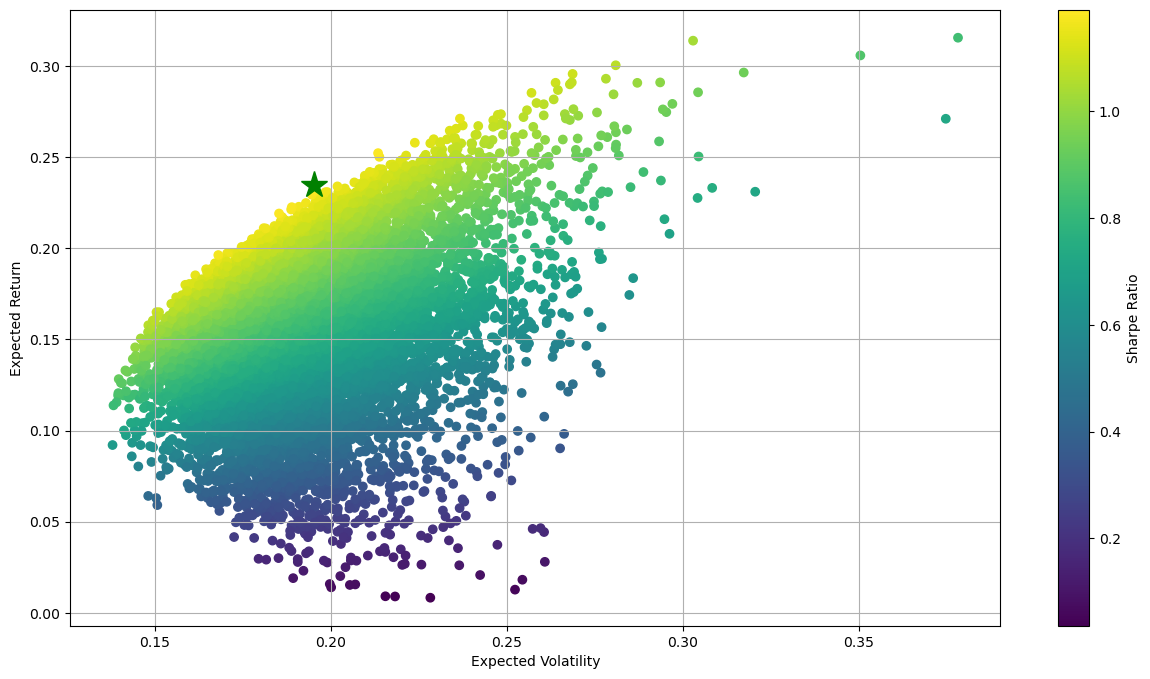

In [72]:
#showPortfolios(portfolios['means'], portfolios['risks'])
optimum = optimizePort(portfolios['weights'], retornos)
showOP(optimum, retornos, portfolios['means'], portfolios['risks'])


# CAPM - Capital Asset Pricing Model

## Risks in Finance

We should hold multiple stocks to reduce risk.

However, isn't possible to avoid all risk even with multiple stocks.

There are two types of risk:
- Unsystematic(Specific) Risk:
    - It is the risk of individual stocks, can be diverzified away
    - A component of stock return that is not correlated with market movement
    
- Systematic(Market) Risk
    - Can'''t be diverzified
    - It is the risk of change in interest rates, recessions or wars
    - CAPM model measures this risk with the Beta parameters
    
 
 
## The Model

CAPM was first formulated by William F. Sharpe (1960) and is a linear relationship between any stock expected return and the market premium.

It is given by:

$$
E[r_a] = r_f + \beta_a(E[r_m]-r_f)
$$

Where:

- E<sub>a</sub>: Expected return

- r<sub>f</sub>: Base return

- B<sub>a</sub>(E[r<sub>m</sub>]-r<sub>f</sub>): Market excess return or market premium, multiplied by a factor

In addition, we can calculate B parameter as:

$$
\beta_a = \frac{Cov(r_a, r_m)}{Var(r_m)}
$$

### Beta

The beta parameter define how risky the portfolio is relative to the market.
If B:
- B = 1: Stock is moving exactly as the market
- B > 1: Stock is more volatile than the market (more expected return)
- B < 1: Stock is less volatile than the market (less expected return)

To calculate Beta for portfolio we use:

$$
\beta = w_1\beta_1 + w_2\beta_2 + ... + w_n\beta_n
$$

It is the weighted sum of stocks Beta's.
- This weights can be calculated with Markovitz-Model

### Linear Regression

It is approach to modelling the relationship between scalar dependent variable **y** and a explanatory variable **x**.

There are two types of linear regression:
- Simple Linear Regression, where there only a single **x** explanatory variable 
- Multiple Linear Regression, with several **x** explanatory variables

$$
y = \beta_{0} + \beta_{1} x_1 + ... + \beta_n x_n + u
$$

A machine learning algorithm trains means that it is finding a linear relationship between **x** and **y**.
- With B value, we can predict **y**

A mean squared error (MSE) is a measure that sum all errors between regression and the true value, if it is small, so means that model predictions are very close to the actual values.

$$
MSE = \sum_i e^2
$$

Moreover, we have R<sup>2</sup> to measure the accuracy of the regression and it is given by:

$$
R^2 = 1 - \frac{RSS}{TSS}
$$

Where:
- RSS: Residual Sum of Squares
- TSS: Total Sum of Squares

## CAPM

With linear regression, we can define a relationship between expected return, risk and market risk.

It is given by:

$$
E[r_a] - r_f = \alpha + \beta_a(E[r_m]-r_f)
$$

Furthermore, we can define alpha as a parameter that measure difference between the return and expected return.


In [91]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

In [104]:
# Market interest rate
RISK_FREE_RATE = 0.05
# To calculate annual return
MONTHS_IN_YEAR = 12
class CAPM:    
    def __init__(self, stocks, startDate, endDate):
        self.stocks = stocks
        self.startDate = startDate
        self.endDate = endDate
        self.data = None
        
    def downloadData(self):
        data = {}
        for stock in self.stocks:
            ticker = yf.download(stock, self.startDate, self.endDate)
            data[stock] = ticker['Adj Close']
            
        return pd.DataFrame(data)
    
    def initialize(self):
        stockData = self.downloadData()
        # Dealing with monthly returns
        stockData = stockData.resample('M').last()
        self.data = stockData
        self.data = pd.DataFrame({
            's_adjclose': stockData[self.stocks[0]],
            'm_adjclose': stockData[self.stocks[1]]
        })
        self.data[['s_returns', 'm_returns']] = np.log(self.data[['s_adjclose', 'm_adjclose']])/self.data[['s_adjclose', 'm_adjclose']].shift(1)
        self.data = self.data[1:]
        
        
    def calculateBeta(self):
        covMatrix = np.cov(self.data['s_returns'], self.data['m_returns'])
        beta = covMatrix[1,0] / covMatrix[1,1]
        print(f"Beta from formula is: {beta}")
        
    def regression(self):
        beta, alpha = np.polyfit(self.data['m_returns'], self.data['s_returns'], deg = 1)
        expReturn = RISK_FREE_RATE + beta*(self.data['m_returns'].mean() * MONTHS_IN_YEAR) - RISK_FREE_RATE
        print(f"Beta from regression is {beta}, Alpha is {alpha}\nExpected Return {expReturn}")
        self.plotRegression(alpha, beta)
        
    def plotRegression(self, alpha, beta):
        fig, axis = plt.subplots(1, figsize = (10, 4))
        axis.scatter(self.data['m_returns'], self.data['s_returns'], label = 'Data Points')
        axis.plot(self.data['m_returns'], beta * self.data['m_returns'] + alpha, color = 'red', label = 'CAPM Line')
        plt.title('Capital Asset Pricing Model - CAPM')
        plt.xlabel('Market Return $R_m$', fontsize = 18)
        plt.xlabel('Stock Return $R_m$')
        plt.legend()
        plt.grid(True)
        plt.show()
        

Daily returns is good when we need a microscopic data, being superior in a short-term.

For long-term models, **monthly** returns are favourable because are at least **approximately normally distributed** and most of models assume this.

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Beta from formula is: 2.833431424702474
Beta from regression is 2.83343142470248, Alpha is 0.031069247352599683
Expected Return 0.1600927800546137


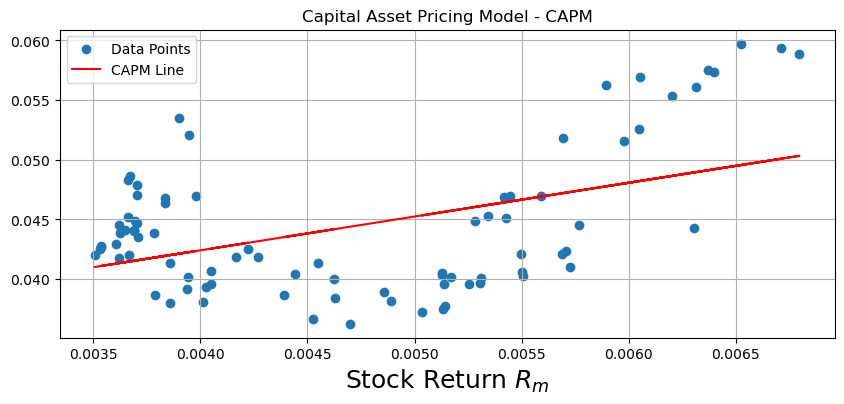

In [106]:
capm = CAPM(['IBM', '^GSPC'], '2010-01-01', '2017-01-01')
capm.initialize()
capm.calculateBeta()
capm.regression()

# Derivatives

Derivatives is a security with a price that is derived from one or more underlying asset.
- His value is determined by the fluctuations on this asset
- It can be:
    - Stocks
    - Bonds
    - Currencies
    - Interests rates
  
Derivatives can be used to:
- **Hedge Risk**, to minimize risk
- **Speculation**, to make profit

## Types of Derivatives

### Forwards Contracts
It is basically a contract between 2 parties to buy or sell a given asset at given price in the future.
- These are not regulated and not present in the stock exchange

### Futures Contracts

Similar to forwards contracts but they are regulated and can be traded.

### Swaps

It is a contract that given asset will be exchanged for another in future.

### Options

Options are contracts that give the right (without the obligation) to buy or sell.



# Forwards and Future Contracts

It is an agreement between two parties for the sale of an asset at an agreed price.
- Used to hedge against risk

#### Forwards
Private agreement, not regulated and not traded on exchanges.

#### Futures
Regulated, tradable on exchanges and transactions guaranteed.

# Swaps

The objective of swap is change one scheme of payments into another of different nature.

### Types of Swap

#### Interest Rate Swaps
Most common and simplest. Two companies, one have fixed interest rate whereas the other has a floating interest rate.

#### Currency Swap
Both parties exchange principal and interest payments on a debt denominated in different currencies.

#### Credit Default Swaps (CDS)
An agreement by a single party to pay the principal amount that is lost as well as the interest on a loan to the CDS buyer if the borrower defaults on their loan.

### Credit Default Swaps (CDS)

It issues bonds that pays interest for a certain period of time.

Credit default swap is a derivative that the seller of the CDS will compensate the buyer in the event of a debt default.
- It enables investor to swap credit risk.


# Options

Similar to forwards and futures contracts. However, the option gives the holder the **right** to trade in the future at a previously agreed price, there no obligations. 

To calculate how much you would pay for a given option, we can use Black-Scholes model.

### Call Option
It is the right to **buy** a particular asset for an agreed E price at the specific T time in the future.

When we buy a call option, we speculate that price will rise.

### Put Option

It is the right to **sell** a particular asset for an agreed E price at the specific T time in the future.

When we buy a call option, we speculate that price will rise.


Types of Options:
- American Options: it can be exercised at any time between t and maturity T time
- European Options: it can be exercised only at T time

# Types of Analysis

### Fundamental Analysis 

It is about the in-depth study of a given company. There are several factors to consider:
- Management team
- Products and Services
- Balance sheets
- Income statements

The price is predicted based on the the intrinsic value of the company.
- However, the price fluctuantion is based on the demand and supply

We can check:
- Assets of company
- Liabilities
- Income statement and net income
- P/E ratio (price to earning) (lower is better)

$$
EPS = \frac{NET\:Income}{Shares}
$$

$$
P/E = \frac{Stock\:Price}{EPS}
$$

### Technical Analysis

This approach doesn't care about the company, it consider that all information in contained within its stock.

Technical analysis is about historical data
- Historical data is interpreted and the analyst look for patterns in stock price
- Machine learning, time series model, etc can be used to make predictions

### Quantitative Analysis

Quantitative analysis try to **model the behavior** of financial assets.

It has an assumption:
- All financial quantities have **random behavior**

We have to use randomness in models, so stochastic calculus and stochastic differential equations are needed.

# Quantitative Analysis

## Random Behavior

It is the fundamental assumption of quantitative analysis. 

To understand the random behavior, we can start analysing daily returns.

Since the daily return is given by:
$$
R(t) = \frac{S(t) - S(t-1)}{S(t-1)}
$$

It can have approximately **normal distributions**.
- Normal distributions may be  defined by:
    - Mean 
    - Variance

So we can determine daily return with these parameters:

$$
R(t) = \mu + x * \sigma
$$

Daily returns can defined by a random variable drawn from a normal distribution.

Furthermore, a stock price S(t) can be described by **W(t)** random walk (called **Wierner process**).
- Has a continuous sample path
- It is independent and normally distributed increment

## Wierner Process

The returns of a given stock price is **N(u, o²)**, but we can't apply the same to stock prices because it can't have negative prices.

So stock prices follow a **log-normal distributions**.

**W(t)** has independet increment:
- Future **W(t + dt) - W(t)** increments are independent of past values
- **W(t)** has Gaussian increments, so it is normally distributed with mean 0 and variance dt

$$
W(t+dt) - W(t) \sim N(0, dt)
$$

But isnt good to modelate stock prices because it can't be explained by normally distribution. Wierner process are fundamental to understand **random walk**.

## Random Walk

Random walk is a stochastic differential equation given by:

$$
dS = \mu\:S\:dt + \sigma\:S\:dW
$$

Where:

$$
dS: S(t+dt) - S(t)
$$
$$
\mu\:S\:dt: deterministic\:part (drift)
$$
$$
\sigma\:S\:dW: stochastic\: part\: with\: Wierner\:process
$$

There some assumptions that we have to follow:
- Continuous model of asset prices


In [1]:
import numpy.random as npr
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def wiernerProcess(dt = 0.1, x0 = 0, n = 1000):
    # W(t=0) [initializing with 0]
    W = np.zeros(n+1)
    
    # N+1 timestamp t = 0, 1, 2...
    t = np.linspace(x0, n, n+1)
    
    # We need to use cumulative sum on every step the  aditional value is drawn from a normal distribution 
    # For N(0, dt), we can use sqrt(dt) + N(0, 1)
    W[1 : n+1] = np.cumsum(np.random.normal(0, np.sqrt(dt), n))
    
    return t, W

def plotProcess(t, W):
    plt.plot(t, W)
    plt.xlabel('Time(t)')
    plt.ylabel('Wierner Process W(t)')
    plt.title('Wierner-Process')
    plt.show()
    
    

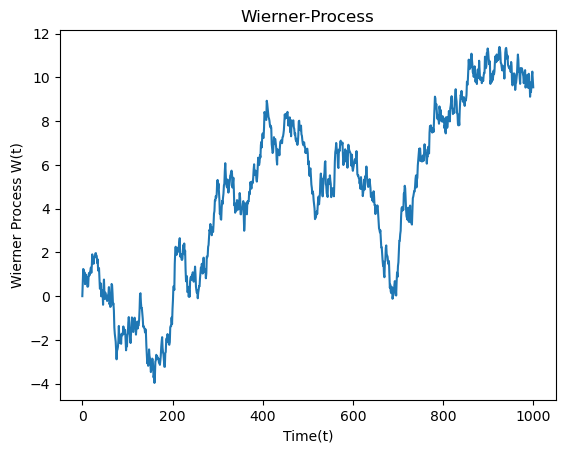

In [14]:
# isn't a good way to modelling because it returns some negative values
t, W = wiernerProcess()
plotProcess(t, W)

## Stochastics Calculus

To ordinary functions (with deterministics variable), we can calculate the derivative of f(x) function by:

$$
f(x) = x^2
$$

$$
\frac{df(x)}{dx} = 2x
$$


$$
df(x) = \frac{df(x)}{dx} = 2xdx
$$

However, we can't use the same approach to stochastiscs random variables, the operation above isn't gonan be true.

To stochastics random variables:

$$
F(X) = X^2
$$

$$
dF(X) = \frac{dF(X)}{dX}dX + \frac{1}{2}\frac{d^2F(x)}{dX^2}dt
$$

Where the solution is:

$$
dF(X) = 2XdX + dt
$$


We need to use Ito's Lemma to handle with stochastics random variables.

The Ito's Lemma has something with Taylor expansion, where we may assume that E[dX] = 0 and E[dX<sup>2</sup>] = dt

$$
F(X+dX) = F(X) + \frac{dF(X)}{dX}dX + \frac{1}{2}\frac{d^2F(x)}{dX^2}dX^2
$$

To handle with the random walk equation:

$$
dS = \mu\:S\:dt + \sigma\:S\:dW
$$

$$
\frac{dS(t)}{S(t)} = \mu\:dt+\sigma\:dW(t)
$$


$$
d(log\:S(t)) = \mu\:dt+\sigma\:dW(t)
$$

$$
F(S) = log\:S(t)
$$

With Ito's Lemma:

$$
dF(X) = \frac{dF(X)}{dX}dX + \frac{1}{2}\frac{d^2F(x)}{dX^2}dt
$$

Where:

$$
dF(S) = \frac{1}{2}dS - \frac{1}{2}\frac{1}{S^2}dS^2
$$

Some terms are too small that we only need to calculate dS<sup>2</sup>.

However, we are dealing with differential equations, so the solution will be something like:

$$
S(t) = S(0)e^{(\mu - \frac{1}{2}\sigma^2)\:t+\sigma\:W_t}
$$

In [15]:
import matplotlib.pyplot as plt
import numpy as np

In [41]:
def simGeometricRandomWalk(S0, T = 2, N = 1000, mu = 0.1, sigma = 0.05):
    dt = T/N
    t = np.linspace(0, T, N)
    W = np.random.standard_normal(size = N)
    W = np.cumsum(W) * np.sqrt(dt)
    X = ((mu - (0.5 * sigma) ** 2)) * (t + sigma + W)
    S = S0 * np.exp(X)
    return t, S

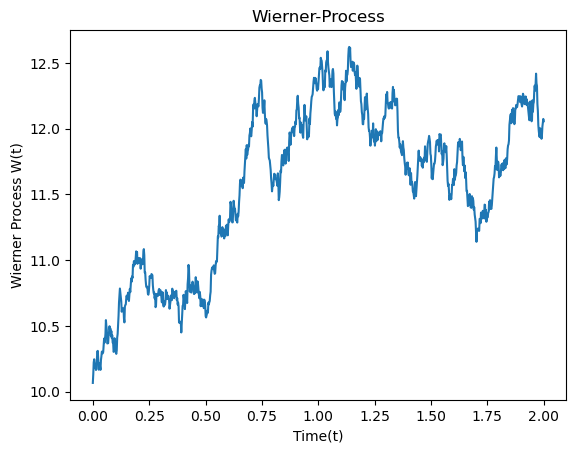

In [46]:
time, data = simGeometricRandomWalk(10)
plotProcess(time, data)

# Black-Scholes Model

It was published by Fischer Black, Robert Merton and Myron Scholes in 1973.

The model shows that combining risky assets can eliminate risk itself.

**Market Neutral strategyes** like delta-hedging and pairs-trading can eliminate all risk.

## Model

The V(S, t, ...) value of an option is a function of various parameters.

$$
V(S, t, \sigma, \mu, E, T, r)
$$

- S, t: Stock price and time are variables
- o, u: Volatility and mean are parameters associated with stock price
- E, T: Strike price and expiry are parameters associated with given option
- r: Parameter associated with risk-free rate

**Call Option**: We expect that price will rise, so the call option in value will rise if the underlying asset rises and fall if the asset falls.
- Positive correlation between two assets

**Put Option**: The put option in value will fall if asset rises and rise if  asset fall.
- Negative correlation between two assets

So we can exploit this correlation to build a rather special portfolio

$$
\pi = V(S, t) - \Delta S
$$

$$
V(S, t):\, Long\: position
$$

$$
\Delta S:\, Short\: position
$$


## Dynamic delta hedge

We have to assume that asset follows a lognormal random walk.

$$
dS = \mu\:S\:dt+\sigma\:S\:dX
$$

The portfolio changes from time t to t+dt:
- Due to change in V(S, t)
- Due the change in S(t)

To deal with these changes, we use Ito's lemma.

$$
d\pi = (\frac{\partial V}{\partial t} + \frac{1}{2} \sigma^2 S^2 \frac{\partial^2 V}{\partial S^2})dt + (\frac{\partial V}{\partial S^2} - \Delta)dS
$$

$$
(\frac{\partial V}{\partial t} + \frac{1}{2} \sigma^2 S^2 \frac{\partial^2 V}{\partial S^2}): \, Deterministic\: part
$$

$$
(\frac{\partial V}{\partial S^2} - \Delta)dS: \, Stochastic\: part
$$

To eliminate risk, we need that delta like this

$$
\frac{\partial V}{\partial S^2} = \Delta
$$

Of course the delta is changing all the time and the perfect hedge musut be continually rebalanced, but in that way, we just need to handle with deterministic part exclusively.

With Black-Scholes, we have **no arbitrage principle**:

The **risk-free rate** dπ change must be the **same as growth** we would get if lend the same amount of cash to a bank:

$$ d\pi = r\:\pi\:dt $$

### No Arbitrage Principle

Usually we assume there are no arbitrage opportunities **or** if there are just for a very short time.
- If no arbitrage is false, all investor could make riskless money

### Equation

# Black-Scholes Model

It was published by Fischer Black, Robert Merton and Myron Scholes in 1973.

The model shows that combining risky assets can eliminate risk itself.

**Market Neutral strategyes** like delta-hedging and pairs-trading can eliminate all risk.

## Model

The V(S, t, ...) value of an option is a function of various parameters.

$$
V(S, t, \sigma, \mu, E, T, r)
$$

- S, t: Stock price and time are variables
- o, u: Volatility and mean are parameters associated with stock price
- E, T: Strike price and expiry are parameters associated with given option
- r: Parameter associated with risk-free rate

**Call Option**: We expect that price will rise, so the call option in value will rise if the underlying asset rises and fall if the asset falls.
- Positive correlation between two assets

**Put Option**: The put option in value will fall if asset rises and rise if  asset fall.
- Negative correlation between two assets

So we can exploit this correlation to build a rather special portfolio

$$
\pi = V(S, t) - \Delta S
$$

$$
V(S, t):\, Long\: position
$$

$$
\Delta S:\, Short\: position
$$


## Dynamic delta hedge

We have to assume that asset follows a lognormal random walk.

$$
dS = \mu\:S\:dt+\sigma\:S\:dX
$$

The portfolio changes from time t to t+dt:
- Due to change in V(S, t)
- Due the change in S(t)

To deal with these changes, we use Ito's lemma.

$$
d\pi = (\frac{\partial V}{\partial t} + \frac{1}{2} \sigma^2 S^2 \frac{\partial^2 V}{\partial S^2})dt + (\frac{\partial V}{\partial S^2} - \Delta)dS
$$

$$
(\frac{\partial V}{\partial t} + \frac{1}{2} \sigma^2 S^2 \frac{\partial^2 V}{\partial S^2}): \, Deterministic\: part
$$

$$
(\frac{\partial V}{\partial S^2} - \Delta)dS: \, Stochastic\: part
$$

To eliminate risk, we need that delta like this

$$
\frac{\partial V}{\partial S^2} = \Delta
$$

Of course the delta is changing all the time and the perfect hedge musut be continually rebalanced, but in that way, we just need to handle with deterministic part exclusively.

With Black-Scholes, we have **no arbitrage principle**:

The **risk-free rate** dπ change must be the **same as growth** we would get if lend the same amount of cash to a bank:

$$ d\pi = r\:\pi\:dt $$

### No Arbitrage Principle

Usually we assume there are no arbitrage opportunities **or** if there are just for a very short time.
- If no arbitrage is false, all investor could make riskless money

### Equation

$$
d\pi = (\frac{\partial V}{\partial t} + \frac{1}{2} \sigma^2 S^2 \frac{\partial^2 V}{\partial S^2})dt + (\frac{\partial V}{\partial S^2} - \Delta)dS
$$

It is a parabolic partial differential equation and linear.
- Financial equations are usually parabolic, they are related to heat and diffusion equations of physics

### How to make money

Several investor use the black-scholes money to eliminate risk, but you can use the model to find mistpriced options in the market.
- You can buy or sell accordingly to make profit

## Pairs Trading Strategy

It is a strategy based on combining a long and short positions in a pair of highly correlated financial instruments.
- Aform of statistical-arbitrage strategy developed in 1980s, in Morgan Stanley

If the correlation between the two stocks weakens, investor should long the underpermoning stock and short the outperforming stock, because they are expected to converge in the future.
- Example: CocaCola and Pepsi (Similar business idea)



In [1]:
from scipy import stats
from numpy import log, exp, sqrt

In [2]:
def callOptionPrice(S, E, T, rf, sigma):
    # Calculating d1 and d2
    d1 = ((log(S/E) + (rf + (sigma * (sigma/2))))*T)/(sigma*sqrt(T))
    d2 = d1 - (sigma*sqrt(T))
    print(f"d1 = {d1}, d2 = {d2}")
    # We use N(x) to calculate the price of the option
    return S*stats.norm.cdf(d1) - (E*exp(-rf*T)*stats.norm.cdf(d2))

def putOptionPrice(S, E, T, rf, sigma):
    # Calculating d1 and d2
    d1 = ((log(S/E) + (rf + (sigma * (sigma/2))))*T)/(sigma*sqrt(T))
    d2 = d1 - (sigma*sqrt(T))
    print(f"d1 = {d1}, d2 = {d2}")
    # We use N(x) to calculate the price of the option
    return -S*stats.norm.cdf(-d1) + (E*exp(-rf*T)*stats.norm.cdf(-d2))


In [3]:
# Stock price
S0 = 100 
# Strike price
E = 100
# Expiry date 1 y = 365 d
T = 1
# Risk-free rate
rf = 0.05
# Volatility
sigma = 0.2

print(f"Call option {callOptionPrice(S0, E, T, rf, sigma)}")

print(f"Put option {putOptionPrice(S0, E, T, rf, sigma)}")

d1 = 0.35000000000000003, d2 = 0.15000000000000002
Call option 10.450583572185565
d1 = 0.35000000000000003, d2 = 0.15000000000000002
Put option 5.573526022256971


# Monte-Carlo Simulations

This method was first used back in the 1940s during **Manhattan Projet** at Los Alamos.

John von Neumann, Stanislaw Ulam and Nicholas Metropolis applied this method to nuclear physics relate problems.

The method consist in solve a deterministic problm using probabilistic method.

The basic principle is that we can estimate outcomes of an uncertain events.
- We have to generate several possible outcomes and then we have to calculate the average of these outcomes
- More iterations, better will be the prediction

If we know the S(0) start point of the stock price and w e know the u(mu) and o(sigma) parameters, then we can make a multiple simulations.
- We know that S(t) assets follow a log-normal random walk

The average of these simulations yields the future S(t) price of the stock.

## Predicting Stock Prices with  Monte-Carlo Simulations

We can generate a huge amount of possible S(t) geometric random walk processes.
- Mean of these simulations yields the S<sub>b</sub>(t) path with the highest probability in the future.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [39]:
nSimulations = 1000

def stockMonteCarlo(S0, mu, sigma, N = 252):
    result = []
    
    for _ in range(nSimulations):
        prices = [S0]
        for _ in range(N):
            stockPrice = prices[-1] * np.exp((mu - (0.5*(sigma**2))) + sigma * np.random.normal())
            
            prices.append(stockPrice)
            
        result.append(prices)
        
    simulationData = pd.DataFrame(result)
    # Every column (nSimulations) will be a simulation
    # Every row (N = 1000) will be a simulation
    simulationData = simulationData.T
    simulationData['mean'] = simulationData.mean(axis = 1)
    plt.figure(figsize = (15, 8))
    #plt.plot(simulationData)
    plt.plot(simulationData['mean'])
    plt.show()
    
    print(f"Prediction for future stock price is $ {round(simulationData['mean'].iloc[-1], 2)}")

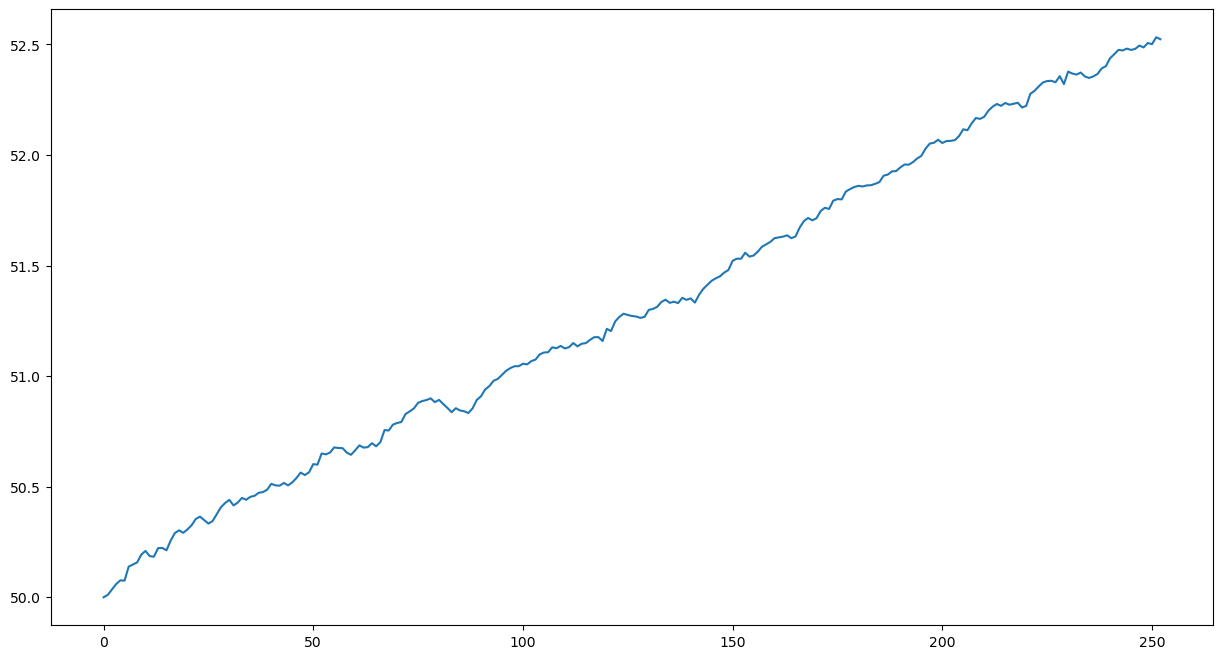

Prediction for future stock price is $ 52.52


In [38]:
stockMonteCarlo(50, 0.0002, 0.01)

# Option Pricing with Monte-Carlo Simulation

For an option of an asset that follows a **geometric random walk**, we can determine the price of option by simulating these stochastics process.

We can obtain log S(t), because we know that stock price can not be negative, with Ito's Lemma F(S) = log S(t)
$$
d\:logS(t) = (\mu - \frac{1}{2} \sigma^2)dt\:\sigma dW
$$

$$
logS(t) = logS(0) +  (\mu - \frac{1}{2} \sigma^2)t\:\sigma \int_0^t dW
$$

If we make a risk-neutral assumption, the u drift becomes the r risk-free interest rate.

$$
S(T) = S(0)e^{[(r \frac{1}{2} \sigma ^2) T + \sigma \sqrt{T} N(0, 1)]}
$$



In [40]:
import numpy as np

In [142]:
class OptionPricing:
    def __init__(self, S0, E, T, rf, sigma, iterations):
        self.S0 = S0
        self.E = E
        self.T = T
        self.rf = rf
        self.sigma = sigma
        self.iterations = iterations
        
    def callOptionSimulation(self):
        # We have 2 columns
            # 1. With 0s
            # 2. With payoffs
        
        # First columns of 0s: payoff function is max(0, S - E) for call option
        optionData = np.zeros([self.iterations, 2])
        
        # dimensions: 1 dimensional array with as many itemns as the iterations
        rand = np.random.normal(0, 1, [1, self.iterations])
        
        # Equation for stock price
        stockPrice = self.S0 * np.exp((self.T *(self.rf - (0.5 * (self.sigma ** 2)))) + self.sigma * np.sqrt(self.T) * rand)
        
        optionData[:, 1] = stockPrice - self.E
        
        average = np.sum(np.amax(optionData, axis = 1)) / float(self.iterations)
        
        return np.exp(-1 * self.rf * self.T)*average
        
    def putOptionSimulation(self):
        optionData = np.zeros([self.iterations, 2])  
        rand = np.random.normal(0, 1, [1, self.iterations])
        stockPrice = self.S0 * np.exp((self.T *(self.rf - (0.5 * (self.sigma ** 2)))) + self.sigma * np.sqrt(self.T) * rand)
        optionData[:, 1] = self.E - stockPrice
        average = np.sum(np.amax(optionData, axis = 1)) / float(self.iterations)
        return np.exp(-1 * self.rf * self.T)*average
        

In [168]:
model = OptionPricing(100, 100, 1, 0.05, 0.2, 1000)
print(f"Call Option: $ {model.callOptionSimulation()} and Put Option $ {model.putOptionSimulation()}")


Call Option: $ 10.588667558086403 and Put Option $ 5.99398606260523


# Value at Risk

VaR is a number measure in price units, it tells you that in a large percentage of cases your portfolio is likely to not lose more than that amount of money.

VaR measures the amount of potential loss that could happen in an investment or a portfolio over a given period of time with given degree of confidence.

You can compare different types of asets or portfolios with **VaR**.
- You can compare profitability and risk of different units and make decision accordingly (Risk Budgeting)

We can measure VaR by variance method and Monte-Carlo approach.

## Variance Method

We assume that returns are normally distributed.

The density of normal distributin function is important.

We would like to make sure the loss is not going to be greater than a predefined value.

VaR is gonne be something like:

$$
VaR = \Delta S[\mu\: \delta t - \sigma \sqrt{\delta t} \alpha (1 - c)]
$$

In [1]:
import numpy as np
import yfinance as yf
from scipy.stats import norm
import pandas as pd
import datetime

In [15]:
def downloadData(stock, startDate, endDate):
    data = {}
    ticker = yf.download(stock, startDate, endDate)
    data[stock] = ticker['Adj Close']
    return pd.DataFrame(data)

def calculateVaR(position, c, mu, sigma):
    '''Value at Risk tomorrow'''
    var = position * (mu - (sigma * norm.ppf(1-c)))
    return var


def calculateFutureVaR(position, c, mu, sigma, n):
    '''Value at Risk tomorrow'''
    var = position * ((mu * n) - (sigma * np.sqrt(n) * norm.ppf(1-c)))
    return var
    

In [16]:
inicio = datetime.date(2014, 1, 1)
fim = datetime.date(2018, 1, 1)
stockData = downloadData('C', inicio, fim)
stockData['Returns'] = np.log(stockData['C']/ stockData['C'].shift(1))
stockData = stockData[1:]

[*********************100%***********************]  1 of 1 completed


In [19]:
s = 1e6
c = 0.95
mu = np.mean(stockData['Returns'])
sigma = np.std(stockData['Returns'])
n = 10
print(f"Value at Risk {calculateVaR(s, c, mu, sigma)} tomorrow")
print(f"Value at Risk for {n} days {calculateFutureVaR(s, c, mu, sigma, n)}")

Value at Risk 25396.70032157316 tomorrow
Value at Risk for 10 days 82897.95006970047


## Monte-Carlo Approach

We assume that stock prices follow a geometric Brownian Motion.

In Monte-Carlo simulation, we generate a large amount of stock prices to estimate with this equations. After that, we sort the stock prices from the smallest to the largest.
- If we need VaR with 99% confidence level, we need 1% lowest percentile S'(t) in this series
    - It is because there 1% that S(t) could fall to S'(t)
    
$$
VaR_{99\%} = S(t) - S'(t)
$$



In [22]:
import numpy as np
import yfinance as yf
from scipy.stats import norm
import pandas as pd
import datetime
import random

In [32]:
def downloadData(stock, startDate, endDate):
    data = {}
    ticker = yf.download(stock, startDate, endDate)
    data[stock] = ticker['Adj Close']
    return pd.DataFrame(data)

class ValueAtRiskMonteCarlo:
    def __init__(self, S, mu, sigma, c, n, iterations):
        self.S = S
        self.mu = mu
        self.sigma = sigma
        self.c = c
        self.n = n
        self.iterations = iterations
        
    def simulation(self):
        rand = np.random.normal(0, 1, [1, self.iterations])
        stockPrice = self.S * np.exp(self.n * (self.mu - (0.5 * (self.sigma ** 2))) + (self.sigma * np.sqrt(self.n) * rand))
        stockPrice = np.sort(stockPrice)
        percentile = np.percentile(stockPrice, (1 - self.c) * 100)
        return self.S - percentile

In [29]:
inicio = datetime.date(2014, 1, 1)
fim = datetime.date(2017, 10, 15)
stockData = downloadData('C', inicio, fim)
stockData['Returns'] = stockData['C'].pct_change()
stockData = stockData[1:]

[*********************100%***********************]  1 of 1 completed


In [33]:
s = 1e6
c = 0.95
mu = np.mean(stockData['Returns'])
sigma = np.std(stockData['Returns'])
n = 1
iterations = 100000

In [37]:
model = ValueAtRiskMonteCarlo(s, mu, sigma, c, n, iterations)
print(f"VaR with Monte-Carlo simulation {model.simulation()}")

VaR with Monte-Carlo simulation 24851.19479245739


# Collateridzed Debt Obligations (CDOs)

Were first constructed in 1987 by bankers at Drexel Burnham Lambert Inc.
- It is a complex structured-finance product that is backed by a pool of loans and other assets

Within 10 years, CDOs have been major force in the market.

A given commercial bank can issue and approve several types of loans:
- Student Loans
- Credit Card Loans
- Mortgage
- Car Loans

The next step is the commercial bank sell this loans to investment banks and create the financial product of CDOs.

Finally, the investment banks sell these CDOs to investor seeking for higher return than treasury bills or bonds.

Diverzification is an extremely crucial factor in credit derivative.
- a given CDOs should contain different assets (bonds and different loans) that are uncorrelated

We should include as **many uncorrelated assets** in credit derivatives as possible.
- possessing assets with high covariance does not provide much diverzification
- the aim of diverzifitcation is to **eliminate fluctuations** in the long term

CDOs have multiple tranches:
- Senior Tranche
    - Will be payed first
    - The most safety tranche
    - AAA credit by rating agencies

- Junior Tranche
    - Get the payouts coming from loans after senior tranche
    - BBB rating by rating
    
- Risky Tranche
    - Gets the payout last coming from the loans
    - It is considered a risky investment, usually purchased by Hedge Funds
    
### Financial Crisis of 2008

The system was working extremely fine for everyone (commercial banks, investment banks and investor).

There was a need for more and more loans and mortgages to be able to sell CDOs.
- This is why subprime mortgage came to be

If the homeowners default on their mortgage, the lender (bank) gets the house.
- Usually **houses prices are increasing**
- This is why lenders can add **more risk to new mortgages**
    - Subprime mortgage is a type of loan granted to individuals with poor credit scores who would not qualify for conventional mortgages
    - This isnt a problem for commercial banks, because if the homeowner defaults, it takes the house

However, because the subprime mortgages, there was a huge probability of default (+ CDOs assets were **highly correlated**).
- When defaults come, investordid not get the payments, but they have bought AAA assets that have defaulted
- So, investor don't want to invest into CDOs anymore and the system froze

The problem is that most commercial banks and investment banks were using leverage (so used loans) and everybody went **bankrupt**.


# Interest Rate Modeling

The main problem is that r(t) market interest rate are fluctuating all the time and companies have loans that depends on the interest rate.
- So, we can use interest rate modeling to price bonds

## Ornstein-Uhlenbeck Process

Based on Wierner process, it is given by:

$$
dx_t = \theta (\mu - x_t)dt + \sigma W_t
$$

u is the equilibrium or mean value and Theta is the rate by wich the process reverts towards the mean.



In [1]:
import numpy as np
from numpy.random import normal
import matplotlib.pyplot as plt

In [6]:
# Pairs trading strategy
def generateProcess(dt = 0.1, theta = 1.2, mu = 0.5, sigma = 0.3, n = 10000):
    # x(t= 0) and initialize x(t) with zeros
    x = np.zeros(n)
    
    for t in range(1, n):
        x[t] = x[t-1] + theta*(mu - x[t-1])*dt + sigma*normal(0, np.sqrt(dt))
        
    return x

def plotProcess(x):
    plt.plot(x)
    plt.xlabel('t')
    plt.ylabel('x(t)')
    plt.title('Ornstein-Uhlenbeck Process')
    


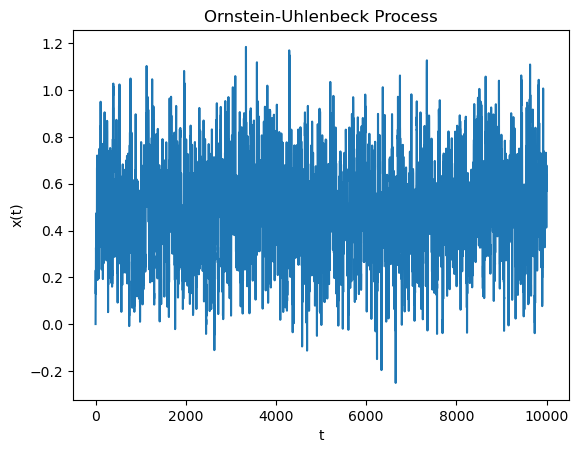

In [10]:
dados = generateProcess()
plotProcess(dados)

# Vasicek Model

First introduced in 1977 by Oldrich Vasicek.

It is a simple short-rate r(t) model.

Bond, mortgages and credit derivatives are quite sensitive to r(t) interest rate changes.
- Interest rate modeling is considered quite a complex topic

r(t) interest rate are affected by a several factors:
- Political decisions
- Government intervention
- Economic states

Vasicek model assumes that the r(t) interest rates follows a mean-reverting Ornstein-Uhlenbeck process.

The model allows r(t) interest rat to be negative, it is given by:

$$
dr(t) = \kappa (\theta - r(t))dt + \sigma W(t)
$$

Where k is the speed of mean reversion and the r(t) interest rate fluctuates around theta.

In [4]:
import matplotlib.pyplot as plt
import numpy as np

In [5]:
def vasicekModel(r0, kappa, theta, sigma, T = 1, N = 1000):
    dt = T/float(N)
    t = np.linspace(0, T, N+1)
    rates = [r0]
    
    
    for _ in range(N):
        dr = kappa * (theta - rates[-1]) * dt + sigma*np.sqrt(dt)*np.random.normal()
        rates.append(rates[-1]+dr)
    
    return t, rates

def plotModel(t, r):
    plt.plot(t, r)
    plt.xlabel('Time (t)')
    plt.ylabel('Interest Rate r(t)')
    plt.title('Vasicek Model')
    plt.show()
    

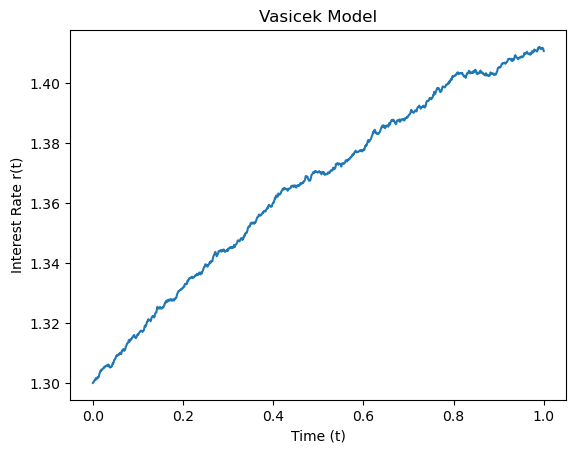

In [10]:
time, data = vasicekModel(1.3, 0.9, 1.5, 0.01)
plotModel(time, data)

# Princing Bonds with Vasicek Model

Based on continuous model of pricing bonds theory, we may construct a model with differentical equations.

Since it is given by:

$$
x(t + dt) - x(t) = r x(t)dt
$$

We can define rx(t) as:

$$
\frac{dx(t)}{dt} = rx(t)
$$

and the solution is

$$
x(t) = x(0) e^{rt}
$$

To calculate bond prices with vasicek model, we assume that r(t) interest rate is not constant and it follows a stochastic process.

So, we have to calculate the discounted value of a future cashflow + handle with stochastic r(t).

$$
P = x e ^ {- \int_t^T r(s)ds}
$$

We can use this solution or calculate the price with Monte-Carlo simulation instead.

TO solve with Monte-Carlo simulation, we can generate a huge amount of possible r(t) interest rates and the mean of these simulations yields of interest rate with highest probability.



In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [38]:
# We will generate 1000 r(t) interest rate process simulations
nSim = 1000
# and 200 number of points in a single r(t) process
nPoints = 200

In [39]:
def monteCarloSimulation(x, r0, kappa, theta, sigma, T = 1):
    dt = T/float(nSim)
    # result is the list of simulations
    result = []
    
    for _ in range(nSim):
        rates = [r0]
        for _ in range(nPoints):
            dr = kappa * (theta - rates[-1]) * dt + sigma*np.sqrt(dt)*np.random.normal()
            rates.append(rates[-1] + dr)
            
        result.append(rates)
        
    simData = pd.DataFrame(result)

    integralSum = simData.sum() * dt
    # To calculate present value, we use exp function
    presIntegralSum = np.exp(-integralSum)
    bondPrice = x * np.mean(presIntegralSum)
    print(f"Bond price based on Monte-Carlo simulation: $ {round(bondPrice, 2)}")
    return bondPrice



In [40]:
preco = monteCarloSimulation(1000, 0.1, 0.3, 0.3, 0.03)
# plt.plot(dados)
# plt.show()

Bond price based on Monte-Carlo simulation: $ 899.4


# Long Term Investing

Algorithmic trading is about making money quickly using quantitative methods to outperform markets.

Value investing is a strategy where stocks are selected to trade for less than their intrinsic value.
- So stocks that are considered to be undervalued by market
- value investor believe that market overreacts to news, resulting in price movements that do not correspond with company long-term fundamentals

## Fundamental analysis

We check the assets of company, such as cash, properties and equipments.

We check liabilities as well (debts and loans).
- Usually we look at the income statement of a company to know how the company makes money (revenue and expenses)
$$
Net\; income = revenues - expenses
$$

Fundamental analysis is about the in-depth study of a given company, where there several factors that affect company price.

Value investing is a long-term investing strategy (buy and hold).

# Efficient Market Hypothesis

"It is impossible to beat the market".

According to Efficient Market Hypothesis, stocks always trade at their fair value
- That makes impossible for investor to buy undervalued stocks
- So it is impossible to outperform the market with stock selection or market timing (and with technical analysis)

The only way to an investor obtain higher return is to take more risk.

All avaiable information is reflected in the S(t) stock price.

We can check thee autocorrelation of stocks returns 
- The returns should have low autocorrelation according to the hypothesis

